In [1]:
#import required libraries
#pandas to make and manipulate dataframes
#numpy for the technical analysis
import pandas as pd
import yfinance as yf
import numpy as np
import math
import panel as pn
pn.extension('plotly')
#import pandas_ta as ta
import hvplot.pandas
import warnings
import tradingview_ta as tv
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib widget

#DAILY CHART ANALYSIS

In [2]:
# parameter setup (default values in the original indicator)
#These are the constants to be used for the moving averages, the bollinger bands and the keltner channels
#ultimately these will be needed for the squeeze and other calculations
length = 20
mult = 2
length_KC = 21
mult_KC = 2

In [3]:
from tradingview_ta import TA_Handler, Interval, Exchange

tesla = TA_Handler(
    symbol="enph",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_DAY,
    # proxies={'http': 'http://example.com:8080'} # Uncomment to enable proxy (replace the URL).
)
print(tesla.get_analysis().summary)

{'RECOMMENDATION': 'STRONG_SELL', 'BUY': 1, 'SELL': 16, 'NEUTRAL': 9}


In [4]:
#With this code you can input any stock and the data for the stock will be pulled from the Yahoo Finance API using yf.Ticker
#The data is pulled for 3 years with a daily timeframe and put into a dataframe called df_stock
value = input("Enter Stock Symbol:")
period = input('enter period of data eg 1y or 2y:')
interval = input('enter candle interval eg 1d, 1wk, 1mo, 1h')
stock = yf.Ticker(value)
print(stock.info)
stock_df = stock.history(period=period, interval=interval)
stock_df.index.duplicated().sum()
df_stock = stock_df.loc[~stock_df.index.duplicated(keep='first')]
df_stock

Enter Stock Symbol: NFLX
enter period of data eg 1y or 2y: 2y
enter candle interval eg 1d, 1wk, 1mo, 1h 1wk


{'address1': '121 Albright Way', 'city': 'Los Gatos', 'state': 'CA', 'zip': '95032', 'country': 'United States', 'phone': '408 540 3700', 'website': 'https://www.netflix.com', 'industry': 'Entertainment', 'industryKey': 'entertainment', 'industryDisp': 'Entertainment', 'sector': 'Communication Services', 'sectorKey': 'communication-services', 'sectorDisp': 'Communication Services', 'longBusinessSummary': 'Netflix, Inc. provides entertainment services. It offers TV series, documentaries, feature films, and mobile games across various genres and languages. The company provides members the ability to receive streaming content through a host of internet-connected devices, including TVs, digital video players, television set-top boxes, and mobile devices. The company has approximately 231 million paid members in 190 countries. Netflix, Inc. was incorporated in 1997 and is headquartered in Los Gatos, California.', 'fullTimeEmployees': 12800, 'companyOfficers': [{'maxAge': 1, 'name': 'Mr. Wil

Open        High         Low       Close  \
Date                                                                        
2022-01-10 00:00:00-05:00  544.270020  544.270020  511.880005  525.690002   
2022-01-17 00:00:00-05:00  520.080017  526.640015  379.989990  397.500000   
2022-01-24 00:00:00-05:00  383.910004  394.799988  351.459991  384.359985   
2022-01-31 00:00:00-05:00  401.970001  458.480011  396.640015  410.170013   
2022-02-07 00:00:00-05:00  410.170013  412.980011  387.649994  391.309998   
2022-02-14 00:00:00-05:00  387.589996  409.359985  385.700012  391.290009   
2022-02-21 00:00:00-05:00  388.950012  392.420013  354.720001  390.799988   
2022-02-28 00:00:00-05:00  387.329987  397.750000  357.170013  361.730011   
2022-03-07 00:00:00-05:00  360.410004  367.019989  340.000000  340.320007   
2022-03-14 00:00:00-04:00  338.720001  381.799988  329.820007  380.600006   
2022-03-21 00:00:00-04:00  378.019989  386.660004  366.429993  373.850006   
2022-03-28 00:00:00-04:00  375.230011  396.500000  366.730011  373.470001   
2022-04-04 00:00:00-04:00  373.549988  396.019989  353.690002  355.880005   
2022-04-11 00:00:00-04:00  350.000000  359.410004  339.859985  341.130005   
2022-04-18 00:00:00-04:00  340.000000  351.679993  210.050003  215.520004   
2022-04-25 00:00:00-04:00  213.809998  216.660004  185.600006  190.360001   
2022-05-02 00:00:00-04:00  191.710007  204.380005  175.809998  180.970001   
2022-05-09 00:00:00-04:00  177.660004  187.770004  162.710007  187.639999   
2022-05-16 00:00:00-04:00  193.300003  195.889999  175.710007  186.350006   
2022-05-23 00:00:00-04:00  186.149994  195.250000  177.169998  195.190002   
2022-05-30 00:00:00-04:00  196.179993  205.470001  190.800003  198.979996   
2022-06-06 00:00:00-04:00  202.089996  207.380005  180.850006  182.940002   
2022-06-13 00:00:00-04:00  177.070007  183.850006  164.279999  175.509995   
2022-06-20 00:00:00-04:00  177.600006  191.190002  169.800003  190.850006   
2022-06-27 00:00:00-04:00  191.770004  192.199997  170.300003  179.949997   
2022-07-04 00:00:00-04:00  176.279999  190.210007  172.679993  186.979996   
2022-07-11 00:00:00-04:00  184.729996  189.220001  169.699997  189.110001   
2022-07-18 00:00:00-04:00  192.500000  229.350006  188.399994  220.440002   
2022-07-25 00:00:00-04:00  221.309998  230.750000  211.639999  224.899994   
2022-08-01 00:00:00-04:00  223.100006  232.070007  220.880005  226.779999   
2022-08-08 00:00:00-04:00  227.490005  251.619995  224.649994  249.300003   
2022-08-15 00:00:00-04:00  248.110001  251.990005  235.679993  241.160004   
2022-08-22 00:00:00-04:00  232.550003  236.949997  223.149994  223.279999   
2022-08-29 00:00:00-04:00  221.929993  233.880005  218.740005  226.110001   
2022-09-05 00:00:00-04:00  225.589996  234.779999  214.690002  233.570007   
2022-09-12 00:00:00-04:00  233.610001  242.289993  215.800003  240.130005   
2022-09-19 00:00:00-04:00  245.050003  250.490005  221.429993  226.410004   
2022-09-26 00:00:00-04:00  225.600006  246.979996  220.720001  235.440002   
2022-10-03 00:00:00-04:00  237.850006  245.800003  224.279999  224.750000   
2022-10-10 00:00:00-04:00  225.639999  238.800003  211.729996  230.000000   
2022-10-17 00:00:00-04:00  234.410004  290.750000  234.399994  289.570007   
2022-10-24 00:00:00-04:00  290.230011  305.630005  280.359985  295.720001   
2022-10-31 00:00:00-04:00  295.130005  299.700012  255.320007  260.790009   
2022-11-07 00:00:00-05:00  261.059998  290.660004  252.089996  290.130005   
2022-11-14 00:00:00-05:00  290.000000  312.709991  287.000000  287.980011   
2022-11-21 00:00:00-05:00  291.000000  292.470001  277.339996  285.540009   
2022-11-28 00:00:00-05:00  284.000000  321.989990  275.940002  320.410004   
2022-12-05 00:00:00-05:00  316.459991  329.000000  302.100006  320.010010   
2022-12-12 00:00:00-05:00  320.000000  332.720001  286.549988  290.709991   
2022-12-19 00:00:00-05:00  289.730011  300.660004  280.809998  294.959991   
2022-12-26 00:00:00-05:00  29

In [5]:
# calculate Bollinger Bands which are the measure of the standard deviation.  These bands are set at the 2 times standard deviation
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg = df_stock['Close'].ewm(span=length).mean()
df_stock['Moving average'] = m_avg
# standard deviation
m_std = df_stock['Close'].rolling(window=length).std()
# upper Bollinger Bands
df_stock['upper_BB'] = m_avg + mult * m_std
# lower Bollinger Bands 
df_stock['lower_BB'] = m_avg - mult * m_std
df_stock['bol_percent_b'] = ((df_stock['Close'] - df_stock['lower_BB'])/(df_stock['upper_BB'] - df_stock['lower_BB']))*100

In [6]:
#Stacked Moving averages, exponentially weighted.  Focusing on Fibonacci numbers here with 8, 21, 34, 55 and 89 day moving averages
m_avg_08 = df_stock['Close'].ewm(span=8).mean()
m_avg_21 = df_stock['Close'].ewm(span=21).mean()
m_avg_34 = df_stock['Close'].ewm(span=34).mean()
m_avg_55 = df_stock['Close'].ewm(span=55).mean()
m_avg_89 = df_stock['Close'].ewm(span=89).mean()

df_stock['m_avg_08'] = m_avg_08
df_stock['m_avg_21'] = m_avg_21
df_stock['m_avg_34'] = m_avg_34
df_stock['m_avg_55'] = m_avg_55
df_stock['m_avg_89'] = m_avg_89

In [7]:
# calculate Keltner Channel which is a measure of the average true range.  In this case the channels are set to twice the average true range
# first we need to calculate True Range
df_stock['tr0'] = abs(df_stock["High"] - df_stock["Low"])
df_stock['tr1'] = abs(df_stock["High"] - df_stock["Close"].shift())
df_stock['tr2'] = abs(df_stock["Low"] - df_stock["Close"].shift())
df_stock['tr'] = df_stock[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR or average true range
range_ma = df_stock['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock['upper_KC'] = m_avg + range_ma * mult_KC
# lower Keltner Channel
df_stock['lower_KC'] = m_avg - range_ma * mult_KC

In [8]:
#ADX Calculations
# Average directional index which shows the trend of the stock.  Above 20 means trending and below means sideways movement

plus_dm = df_stock["High"].diff()
minus_dm = df_stock["Low"].diff()
plus_dm[plus_dm < 0] = 0
minus_dm[minus_dm > 0] = 0

#plus_di and minus di show the direction of the trend, if plus_di > minus_di the trend is positive
#if minus_di > plus_di the trend is negative
df_stock['atr'] = df_stock['tr'].ewm(span=14).mean()
df_stock['plus_di'] = 100 * (plus_dm.ewm(alpha = 1/14).mean() / df_stock['atr'])
df_stock['minus_di'] = abs(100 * (minus_dm.ewm(alpha = 1/14).mean() / df_stock['atr']))
dx = (abs(df_stock['plus_di'] - df_stock['minus_di']) / abs(df_stock['plus_di'] + df_stock['minus_di'])) * 100
adx = ((dx.shift(1) * (14 - 1)) + dx) / 14
df_stock['adx'] = adx.ewm(alpha = 1/14).mean() #ADX>20 is trending ADX<20 not trending

In [9]:
# check for 'squeeze' see if the squeeze is on or off.
df_stock['squeeze_on'] = (df_stock['lower_BB'] > df_stock['lower_KC']) & (df_stock['upper_BB'] < df_stock['upper_KC'])
df_stock['squeeze_off'] = (df_stock['lower_BB'] < df_stock['lower_KC']) & (df_stock['upper_BB'] > df_stock['upper_KC'])

In [10]:
# Momentum
# This is the code to eventually make the histograms momentum indicator in the squeeze.  This is where the df['value'] number comes in.

highest = df_stock['High'].rolling(window = length_KC).max()
lowest = df_stock['Low'].rolling(window = length_KC).min()
m1 = (highest + lowest) / 2
df_stock['value'] = (df_stock['Close'] - (m1 + m_avg)/2)
fit_y = np.array(range(0,length_KC))
df_stock['value'] = df_stock['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y, x, 1)[1], raw=True)

df_stock[['squeeze_on', 'squeeze_off']] = (df_stock[['squeeze_on', 'squeeze_off']] == True).astype(float)

df_stock["pct_change"] = df_stock['Close'].pct_change()*100

"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions =  [
    (df_stock['pct_change'] > 0),
    (df_stock['pct_change'] < 0)
]

label = [1, 0]
df_stock['profitable?'] = np.select(conditions, label) 
df_stock.dropna(inplace=True)
df_stock.tail()

Open        High         Low       Close  \
Date                                                                        
2024-01-08 00:00:00-05:00  468.429993  474.750000  468.299988  474.600006   
2024-01-09 00:00:00-05:00  471.869995  474.929993  471.350006  473.880005   
2024-01-10 00:00:00-05:00  474.160004  477.450012  473.869995  476.559998   
2024-01-11 00:00:00-05:00  477.589996  478.119995  472.260010  476.350006   
2024-01-12 00:00:00-05:00  477.839996  478.600006  475.230011  476.679993   

                             Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                          
2024-01-08 00:00:00-05:00  74879100        0.0           0.0            0.0   
2024-01-09 00:00:00-05:00  65931400        0.0           0.0            0.0   
2024-01-10 00:00:00-05:00  67310600        0.0           0.0            0.0   
2024-01-11 00:00:00-05:00  77940700        0.0           0.0            0.0   
2024-01-12 00:00:00-05:00  57944000        0.0           0.0            0.0   

                           Moving average    upper_BB    lower_BB  \
Date                                                                
2024-01-08 00:00:00-05:00      468.386196  478.992375  457.780018   
2024-01-09 00:00:00-05:00      468.909416  478.002862  459.815971   
2024-01-10 00:00:00-05:00      469.638043  477.453389  461.822697   
2024-01-11 00:00:00-05:00      470.277278  476.879462  463.675093   
2024-01-12 00:00:00-05:00      470.887060  477.451997  464.322123   

                           bol_percent_b    m_avg_08    m_avg_21    m_avg_34  \
Date                                                                           
2024-01-08 00:00:00-05:00      79.293349  471.463401  467.995847  462.826339   
2024-01-09 00:00:00-05:00      77.330611  472.000424  468.530770  463.457977   
2024-01-10 00:00:00-05:00      94.284378  473.013663  469.260700  464.206664   
2024-01-11 00:00:00-05:00      95.990297  473.755072  469.905182  464.900569   
2024-01-12 00:00:00-05:00      94.120243  474.405055  470.521074  465.573679   

                             m_avg_55    m_avg_89       tr0       tr1  \
Date                                                                    
2024-01-08 00:00:00-05:00  456.271267  449.340964  6.450012  6.829987   
2024-01-09 00:00:00-05:00  456.900150  449.886276  3.579987  0.329987   
2024-01-10 00:00:00-05:00  457.602288  450.479026  3.580017  3.570007   
2024-01-11 00:00:00-05:00  458.271849  451.053936  5.859985  1.559998   
2024-01-12 00:00:00-05:00  458.929283  451.623404  3.369995  2.250000   

                                tr2        tr    upper_KC    lower_KC  \
Date                                                                    
2024-01-08 00:00:00-05:00  0.379974  6.829987  476.629153  460.143239   
2024-01-09 00:00:00-05:00  3.250000  3.579987  477.053920  460.764912   
2024-01-10 00:00:00-05:00  0.010010  3.580017  477.693050  461.583036   
2024-01-11 00:00:00-05:00  4.299988  5.859985  478.665463  461.889092   
2024-01-12 00:00:00-05:00  1.119995  3.369995  479.125409  462.648711   

                                atr    plus_di   minus_di        adx  \
Date                                                                   
2024-01-08 00:00:00-05:00  4.230865  28.955545  18.744129  40.457419   
2024-01-09 00:00:00-05:00  4.144081  27.760596  17.769757  39.099459   
2024-01-10 00:00:00-05:00  4.068873  30.678032  16.805482  37.911119   
2024-01-11 00:00:00-05:00  4.307688  28.018403  17.409577  37.260093   
2024-01-12 00:00:00-05:00  4.182662  27.614505  16.649262  36.273976   

                           squeeze_on  squeeze_off     value  pct_change  \
Date                                                                       
2024-01-08 00:00:00-05:00         0.0          1.0  5.314977    1.427593   
2024-01-09 00:00:00-05:00         0.0          1.0  4.742948   -0.151707   
2024-01-10 00:00:00-05:00         1.0          0.0  4.643405 

In [11]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1 = (df_stock['squeeze_off'][-2] == 0) | (df_stock['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2 = df_stock['value'][-1] > 0

enter_long = long_cond1 and long_cond2
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1 = (df_stock['squeeze_off'][-2] == 0) | (df_stock['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2 = df_stock['value'][-1] < 0
enter_short = short_cond1 and short_cond2

In [12]:
#import mplfinance to make the candlestick charts.  So far I have found this to be the best package for display purposes.
import mplfinance as mpf
import matplotlib.pyplot as plt
import mpld3
from mpld3 import fig_to_html, save_html
%matplotlib
# Creating dataframe to graph in candle stick mode
ohcl = df_stock[['Open', 'High', 'Close', 'Low']]
ohcl.head()

Using matplotlib backend: module://ipympl.backend_nbagg


Open       High      Close        Low
Date                                                                 
2004-03-11 00:00:00-05:00  76.663772  77.257163  75.790733  75.777089
2004-03-12 00:00:00-05:00  76.206801  76.875219  76.786552  76.104490
2004-03-15 00:00:00-05:00  76.575128  76.629694  75.845322  75.640706
2004-03-16 00:00:00-05:00  76.240904  76.431881  76.247726  75.599764
2004-03-17 00:00:00-05:00  76.513730  77.250358  77.100304  76.459164

In [13]:
# add colors for the 'value bar'.  See the comment below for what the colors mean.
colors = []
for ind, val in enumerate(df_stock['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock['value'][ind-1]:
      color='red'
  colors.append(color)

In [14]:
#This column of colors is added to the dataframe because it will be used as part of our algorithmic trade entry signals
#Red histogram is mark down, Blue is distribution, Yellow is accumulation, and Cyan is mark up
#Generally we want to enter on a squeeze where there is a yellow or cyan histogram
df_stock['colors'] = colors
df_stock['ADX_trend'] = 20

In [15]:
import math

df_stock['VWAP'] = (df_stock['Volume'] * (df_stock['High'] + df_stock['Low']) / 2).cumsum() / df_stock['Volume'].cumsum()
df_stock['VWAP_MEAN_DIFF'] = ((df_stock['High'] + df_stock['Low']) / 2) - df_stock['VWAP']
df_stock['SQ_DIFF'] = df_stock['VWAP_MEAN_DIFF'].apply(lambda x: math.pow(x, 2))
df_stock['SQ_DIFF_MEAN'] = df_stock['SQ_DIFF'].expanding().mean()
df_stock['STDEV_TT'] = df_stock['SQ_DIFF_MEAN'].apply(math.sqrt)

stdev_multiple_1 = 1.28
stdev_multiple_2 = 2.01
stdev_multiple_3 = 2.51

df_stock['STDEV_1'] = df_stock['VWAP'] + stdev_multiple_1 * df_stock['STDEV_TT']
df_stock['STDEV_N1'] = df_stock['VWAP'] - stdev_multiple_1 * df_stock['STDEV_TT']


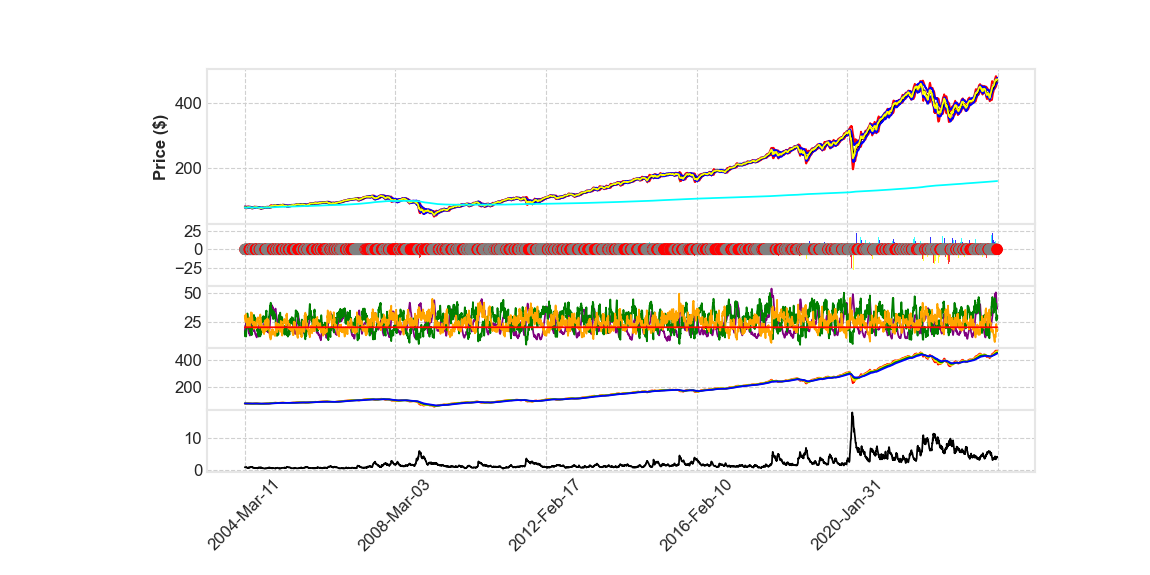

In [16]:
# Adding all the plots including ADX, Stacked moving averages and Squeeze,2 subplots: 1. bars, 2. crosses
#plt.ion()
apds = [mpf.make_addplot(df_stock['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock['Moving average'], color = 'black'),
        mpf.make_addplot(df_stock['m_avg_08'], color = 'yellow'),
        mpf.make_addplot(df_stock[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock[['ADX_trend']], panel=2, color = 'red', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_89'], panel=3, color='blue', secondary_y=False),
        mpf.make_addplot(df_stock[['atr']], panel=4, color = 'black', secondary_y=False),
        mpf.make_addplot(df_stock[['VWAP']], color = 'cyan', secondary_y=False)]

# Plot ohcl with subplots
#Panel 1 is the squeeze
#Panel 2 is the ADX
#Panel 3 is the stacked moving average momentum indicators
fig, axes = mpf.plot(df_stock, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle',
              style='binance',
              ylabel='Price ($)',       
              addplot=apds,
              returnfig=True)
#mpld3.display(fig)
#plt.show(block=True)

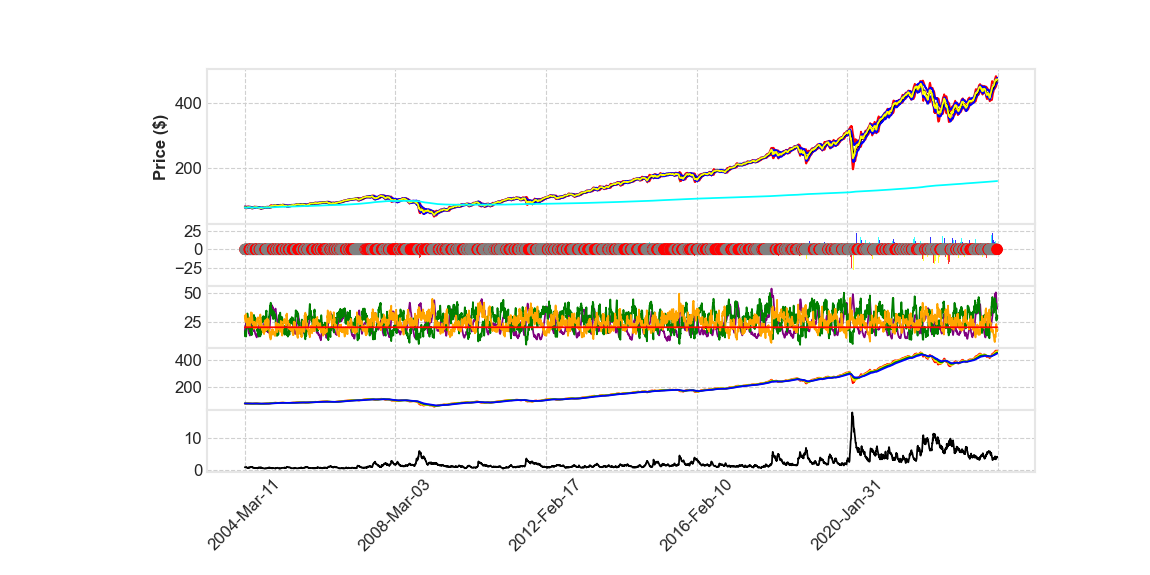

In [17]:
#%matplotlib ipympl
apds = [mpf.make_addplot(df_stock['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock['Moving average'], color = 'black'),
        mpf.make_addplot(df_stock['m_avg_08'], color = 'yellow'),
        mpf.make_addplot(df_stock[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock[['ADX_trend']], panel=2, color = 'red', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_89'], panel=3, color='blue', secondary_y=False),
        mpf.make_addplot(df_stock[['atr']], panel=4, color = 'black', secondary_y=False),
        mpf.make_addplot(df_stock[['VWAP']], color = 'cyan', secondary_y=False)]

# Plot ohcl with subplots
#Panel 1 is the squeeze
#Panel 2 is the ADX
#Panel 3 is the stacked moving average momentum indicators
fig, axes = mpf.plot(df_stock, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle',
              style='binance',
              ylabel='Price ($)',       
              addplot=apds,
              returnfig=True)
plt.show()

In [18]:
save_html(fig, f'{value}_daily_plot.html')

In [20]:
# Python code to illustrate Sending mail with attachments 
# from your Gmail account  
  
# libraries to be imported 
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
   
fromaddr = "akkrishn1@gmail.com"
toaddr = "fastandtheferocious@gmail.com"
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = f"Latest {value} daily chart"
  
# string to store the body of the mail 
body = f"Here is the latest {value} daily chart for your review"
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = f"{value}_daily_plot.png"
attachment = open(f"C:/Users/akkrishn/SqueezeMeBabyOneMoreTime/{value}_daily_plot.png", "rb") 
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login(fromaddr, "Kr15hn40709!") 
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 
  
# terminating the session 
s.quit() 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/akkrishn/SqueezeMeBabyOneMoreTime/ma_daily_plot.png'

In [18]:
def stochastics( dataframe, low, high, close, k, d ):
    """
    Fast stochastic calculation
    %K = (Current Close - Lowest Low)/
    (Highest High - Lowest Low) * 100
    %D = 3-day SMA of %K

    Slow stochastic calculation
    %K = %D of fast stochastic
    %D = 3-day SMA of %K

    When %K crosses above %D, buy signal 
    When the %K crosses below %D, sell signal
    
    Slow stochastics is an oscillating momentum indicator
    It goes up with the stock and down as well
    Right now 70 is considered overbought and 30 is oversold
    """

    df = dataframe.copy()

    # Set minimum low and maximum high of the k stoch
    low_min  = df[low].rolling( window = k ).min()
    high_max = df[high].rolling( window = k ).max()

    # Fast Stochastic
    df['k_fast'] = 100 * (df[close] - low_min)/(high_max - low_min)
    df['d_fast'] = df['k_fast'].rolling(window = d).mean()

    # Slow Stochastic
    df['k_slow'] = df["d_fast"]
    df['d_slow'] = df['k_slow'].rolling(window = d).mean()

    return df


stochs = stochastics( df_stock, 'Low', 'High', 'Close', 14, 3 )
slow_k = stochs['k_slow'].values
fast_k = stochs['k_fast'].values
df_stock["slow_K"] = slow_k
df_stock['fast_K'] = fast_k
df_stock.tail()

Open        High         Low       Close  \
Date                                                                        
2024-01-08 00:00:00-05:00  468.429993  474.750000  468.299988  474.600006   
2024-01-09 00:00:00-05:00  471.869995  474.929993  471.350006  473.880005   
2024-01-10 00:00:00-05:00  474.160004  477.450012  473.869995  476.559998   
2024-01-11 00:00:00-05:00  477.589996  478.119995  472.260010  476.350006   
2024-01-12 00:00:00-05:00  477.839996  478.600006  475.230011  476.679993   

                             Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                          
2024-01-08 00:00:00-05:00  74879100        0.0           0.0            0.0   
2024-01-09 00:00:00-05:00  65931400        0.0           0.0            0.0   
2024-01-10 00:00:00-05:00  67310600        0.0           0.0            0.0   
2024-01-11 00:00:00-05:00  77940700        0.0           0.0            0.0   
2024-01-12 00:00:00-05:00  57944000        0.0           0.0            0.0   

                           Moving average    upper_BB    lower_BB  \
Date                                                                
2024-01-08 00:00:00-05:00      468.386196  478.992375  457.780018   
2024-01-09 00:00:00-05:00      468.909416  478.002862  459.815971   
2024-01-10 00:00:00-05:00      469.638043  477.453389  461.822697   
2024-01-11 00:00:00-05:00      470.277278  476.879462  463.675093   
2024-01-12 00:00:00-05:00      470.887060  477.451997  464.322123   

                           bol_percent_b    m_avg_08    m_avg_21    m_avg_34  \
Date                                                                           
2024-01-08 00:00:00-05:00      79.293349  471.463401  467.995847  462.826339   
2024-01-09 00:00:00-05:00      77.330611  472.000424  468.530770  463.457977   
2024-01-10 00:00:00-05:00      94.284378  473.013663  469.260700  464.206664   
2024-01-11 00:00:00-05:00      95.990297  473.755072  469.905182  464.900569   
2024-01-12 00:00:00-05:00      94.120243  474.405055  470.521074  465.573679   

                             m_avg_55    m_avg_89       tr0       tr1  \
Date                                                                    
2024-01-08 00:00:00-05:00  456.271267  449.340964  6.450012  6.829987   
2024-01-09 00:00:00-05:00  456.900150  449.886276  3.579987  0.329987   
2024-01-10 00:00:00-05:00  457.602288  450.479026  3.580017  3.570007   
2024-01-11 00:00:00-05:00  458.271849  451.053936  5.859985  1.559998   
2024-01-12 00:00:00-05:00  458.929283  451.623404  3.369995  2.250000   

                                tr2        tr    upper_KC    lower_KC  \
Date                                                                    
2024-01-08 00:00:00-05:00  0.379974  6.829987  476.629153  460.143239   
2024-01-09 00:00:00-05:00  3.250000  3.579987  477.053920  460.764912   
2024-01-10 00:00:00-05:00  0.010010  3.580017  477.693050  461.583036   
2024-01-11 00:00:00-05:00  4.299988  5.859985  478.665463  461.889092   
2024-01-12 00:00:00-05:00  1.119995  3.369995  479.125409  462.648711   

                                atr    plus_di   minus_di        adx  \
Date                                                                   
2024-01-08 00:00:00-05:00  4.230865  28.955545  18.744129  40.457419   
2024-01-09 00:00:00-05:00  4.144081  27.760596  17.769757  39.099459   
2024-01-10 00:00:00-05:00  4.068873  30.678032  16.805482  37.911119   
2024-01-11 00:00:00-05:00  4.307688  28.018403  17.409577  37.260093   
2024-01-12 00:00:00-05:00  4.182662  27.614505  16.649262  36.273976   

                           squeeze_on  squeeze_off     value  pct_change  \
Date                                                                       
2024-01-08 00:00:00-05:00         0.0          1.0  5.314977    1.427593   
2024-01-09 00:00:00-05:00         0.0          1.0  4.742948   -0.151707   
2024-01-10 00:00:00-05:00         1.0          0.0  4.643405 

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

#RSI stands for Relative strength Indicator
#it is also a momentum oscillation indicator but moves a lot slower than the stochastics
#if the stock goes up the RSI should go up and vice versa
#if it doesn't this indicates a divergence, especially at the higher timeframes
#again 70 is overbought and 30 is oversold
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

df_stock['rsi_09'] = get_rsi(df_stock['Close'], 9)
df_stock = df_stock.dropna()
df_stock['Overbought'] = 65
df_stock['Oversold'] = 35
df_stock['percent_b_high'] = 90
df_stock['percent_b_low'] = 10
df_stock.tail()

Open        High         Low       Close  \
Date                                                                        
2024-01-08 00:00:00-05:00  468.429993  474.750000  468.299988  474.600006   
2024-01-09 00:00:00-05:00  471.869995  474.929993  471.350006  473.880005   
2024-01-10 00:00:00-05:00  474.160004  477.450012  473.869995  476.559998   
2024-01-11 00:00:00-05:00  477.589996  478.119995  472.260010  476.350006   
2024-01-12 00:00:00-05:00  477.839996  478.600006  475.230011  476.679993   

                             Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                          
2024-01-08 00:00:00-05:00  74879100        0.0           0.0            0.0   
2024-01-09 00:00:00-05:00  65931400        0.0           0.0            0.0   
2024-01-10 00:00:00-05:00  67310600        0.0           0.0            0.0   
2024-01-11 00:00:00-05:00  77940700        0.0           0.0            0.0   
2024-01-12 00:00:00-05:00  57944000        0.0           0.0            0.0   

                           Moving average    upper_BB    lower_BB  \
Date                                                                
2024-01-08 00:00:00-05:00      468.386196  478.992375  457.780018   
2024-01-09 00:00:00-05:00      468.909416  478.002862  459.815971   
2024-01-10 00:00:00-05:00      469.638043  477.453389  461.822697   
2024-01-11 00:00:00-05:00      470.277278  476.879462  463.675093   
2024-01-12 00:00:00-05:00      470.887060  477.451997  464.322123   

                           bol_percent_b    m_avg_08    m_avg_21    m_avg_34  \
Date                                                                           
2024-01-08 00:00:00-05:00      79.293349  471.463401  467.995847  462.826339   
2024-01-09 00:00:00-05:00      77.330611  472.000424  468.530770  463.457977   
2024-01-10 00:00:00-05:00      94.284378  473.013663  469.260700  464.206664   
2024-01-11 00:00:00-05:00      95.990297  473.755072  469.905182  464.900569   
2024-01-12 00:00:00-05:00      94.120243  474.405055  470.521074  465.573679   

                             m_avg_55    m_avg_89       tr0       tr1  \
Date                                                                    
2024-01-08 00:00:00-05:00  456.271267  449.340964  6.450012  6.829987   
2024-01-09 00:00:00-05:00  456.900150  449.886276  3.579987  0.329987   
2024-01-10 00:00:00-05:00  457.602288  450.479026  3.580017  3.570007   
2024-01-11 00:00:00-05:00  458.271849  451.053936  5.859985  1.559998   
2024-01-12 00:00:00-05:00  458.929283  451.623404  3.369995  2.250000   

                                tr2        tr    upper_KC    lower_KC  \
Date                                                                    
2024-01-08 00:00:00-05:00  0.379974  6.829987  476.629153  460.143239   
2024-01-09 00:00:00-05:00  3.250000  3.579987  477.053920  460.764912   
2024-01-10 00:00:00-05:00  0.010010  3.580017  477.693050  461.583036   
2024-01-11 00:00:00-05:00  4.299988  5.859985  478.665463  461.889092   
2024-01-12 00:00:00-05:00  1.119995  3.369995  479.125409  462.648711   

                                atr    plus_di   minus_di        adx  \
Date                                                                   
2024-01-08 00:00:00-05:00  4.230865  28.955545  18.744129  40.457419   
2024-01-09 00:00:00-05:00  4.144081  27.760596  17.769757  39.099459   
2024-01-10 00:00:00-05:00  4.068873  30.678032  16.805482  37.911119   
2024-01-11 00:00:00-05:00  4.307688  28.018403  17.409577  37.260093   
2024-01-12 00:00:00-05:00  4.182662  27.614505  16.649262  36.273976   

                           squeeze_on  squeeze_off     value  pct_change  \
Date                                                                       
2024-01-08 00:00:00-05:00         0.0          1.0  5.314977    1.427593   
2024-01-09 00:00:00-05:00         0.0          1.0  4.742948   -0.151707   
2024-01-10 00:00:00-05:00         1.0          0.0  4.643405 

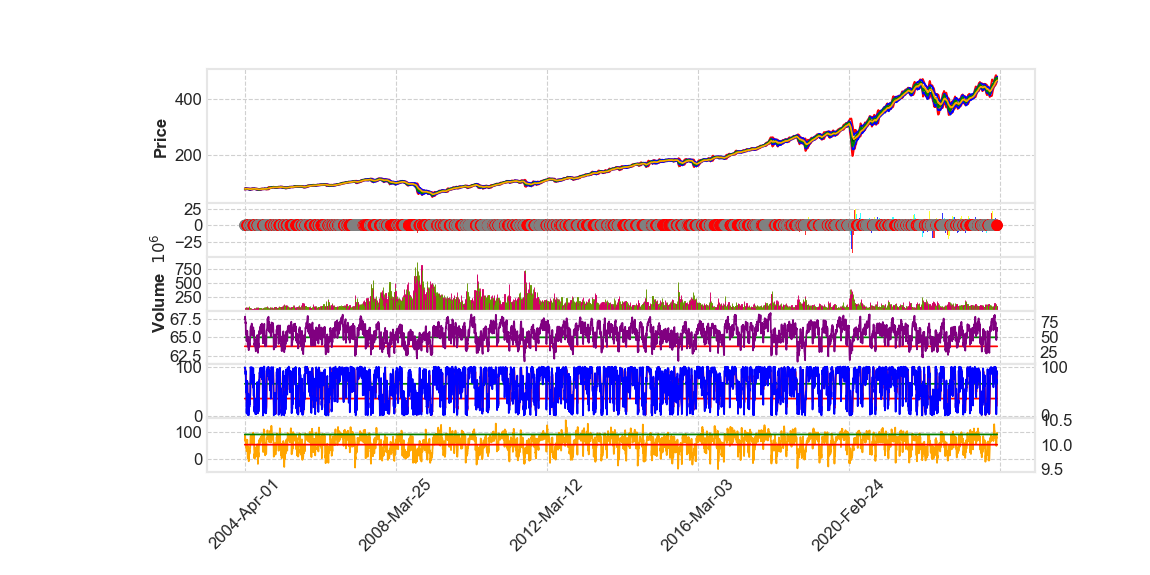

In [20]:
#this plot provides the second set of studies which include the Slow Stochastic and the RSI
apds2 = [mpf.make_addplot(df_stock['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
         mpf.make_addplot([0] * len(df_stock), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock['squeeze_off']], secondary_y=False),
         mpf.make_addplot(df_stock[['upper_BB']], color = 'red'),
         mpf.make_addplot(df_stock[['lower_BB']], color = 'red'),
         mpf.make_addplot(df_stock[['upper_KC']], color = 'blue'),
         mpf.make_addplot(df_stock[['lower_KC']], color = 'blue'),
         mpf.make_addplot(df_stock['Moving average'], color = 'black'),
         mpf.make_addplot(df_stock['m_avg_08'], color = 'green'),
         mpf.make_addplot(df_stock['m_avg_34'], color = 'orange'),
         mpf.make_addplot(df_stock['slow_K'], panel=4, color = 'red'),
         mpf.make_addplot(df_stock['fast_K'], panel=4, color = 'blue'),
         mpf.make_addplot(df_stock['Overbought'], panel=4, color = 'green'),
         mpf.make_addplot(df_stock['Oversold'], panel=4, color = 'red'),
         mpf.make_addplot(df_stock['Overbought'], panel=3, color = 'green'),
         mpf.make_addplot(df_stock['Oversold'], panel=3, color = 'red'),
         mpf.make_addplot(df_stock['rsi_09'], panel=3, color='purple'),
         mpf.make_addplot(df_stock['bol_percent_b'], panel=5, color='orange'),
         mpf.make_addplot(df_stock['percent_b_high'], panel=5, color = 'green'),
         mpf.make_addplot(df_stock['percent_b_low'], panel=5, color = 'red')]

# Plot ohcl with subplots
#Panel 1 is the squeeze
#Panel 2 is the Slow Stochastics
#Panel 3 is the RSI
fig, axes = mpf.plot(df_stock, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle',
              style='binance',
              addplot=apds2,
              volume=True,
              returnfig=True)

In [69]:
fig.savefig(f'{value}_daily_plot_stoch.png', bbox_inches='tight', dpi=150)

In [23]:
# Python code to illustrate Sending mail with attachments 
# from your Gmail account  
  
# libraries to be imported 
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
   
fromaddr = "akkrishn1@gmail.com"
toaddr = "fastandtheferocious@gmail.com"
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = f"{value} stochastics and bollinger %"
  
# string to store the body of the mail 
body = f"{value} daily graph that includes percent B and stochastics"
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = f"{value}_daily_plot_stoch.png"
attachment = open(f"C:/Users/akkrishn/SqueezeMeBabyOneMoreTime/{value}_daily_plot_stoch.png", "rb") 
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login(fromaddr, "Kr15hn40709") 
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 
  
# terminating the session 
s.quit() 

(221, b'2.0.0 closing connection w4sm11941750pjq.7 - gsmtp')

In [21]:
#This code takes a group of 2 to 3 candles and tells the trader if the swing over the next day to few days will be bullish, bearish, or no pattern
for i in range(2,df_stock.shape[0]):
    current = df_stock.iloc[i,:]
    prev = df_stock.iloc[i-1,:]
    prev_2 = df_stock.iloc[i-2,:]
    realbody = abs(current['Open'] - current['Close'])
    candle_range = current['High'] - current['Low']
    idx = df_stock.index[i]  
# Bullish swing
    df_stock.loc[idx,'Bullish swing'] = current['Low'] > prev['Low'] and prev['Low'] < prev_2['Low']
# Bearish swing
    df_stock.loc[idx,'Bearish swing'] = current['High'] < prev['High'] and prev['High'] > prev_2['High']
# Bullish pinbar
    df_stock.loc[idx,'Bullish pinbar'] = realbody <= candle_range/3 and  min(current['Open'], current['Close']) > (current['High'] + current['Low'])/2 and current['Low'] < prev['Low']
# Bearish pinbar
    df_stock.loc[idx,'Bearish pinbar'] = realbody <= candle_range/3 and max(current['Open'] , current['Close']) < (current['High'] + current['Low'])/2 and current['High'] > prev['High']
    
  # Inside bar
    df_stock.loc[idx,'Inside bar'] = current['High'] < prev['High'] and current['Low'] > prev['Low']
    
  # Outside bar
    df_stock.loc[idx,'Outside bar'] = current['High'] > prev['High'] and current['Low'] < prev['Low']
  
  # Bullish engulfing
    df_stock.loc[idx,'Bullish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] > current['Open']
# Bearish engulfing
    df_stock.loc[idx,'Bearish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] < current['Open']

df_stock.fillna(False, inplace=True)

In [22]:
columns = ['Bullish swing', 'Bearish swing', 'Bullish pinbar', 'Bearish pinbar', 'Inside bar', 'Outside bar', 'Bullish engulfing','Bearish engulfing']
#The creation of this column using this function is to use this for a graph or to get you the latest pattern

def convert(df):
    patterns = []
    for i in columns:
        if df[i]:
            patterns.append(i)
    #df['patterns'] = patterns
    if not patterns:
        patterns.append('No pattern')
    return patterns

#df_stock_dow.apply(convert, axis=1)
df_stock['pattern'] = df_stock.apply(convert, axis = 1)
df_stock['pattern'].tail(10)

Date
2023-12-29 00:00:00-05:00    [Bearish swing, Bullish pinbar]
2024-01-02 00:00:00-05:00                   [Bullish pinbar]
2024-01-03 00:00:00-05:00                       [No pattern]
2024-01-04 00:00:00-05:00                       [No pattern]
2024-01-05 00:00:00-05:00                       [No pattern]
2024-01-08 00:00:00-05:00                    [Bullish swing]
2024-01-09 00:00:00-05:00                       [No pattern]
2024-01-10 00:00:00-05:00                       [No pattern]
2024-01-11 00:00:00-05:00      [Bullish pinbar, Outside bar]
2024-01-12 00:00:00-05:00                    [Bullish swing]
Name: pattern, dtype: object

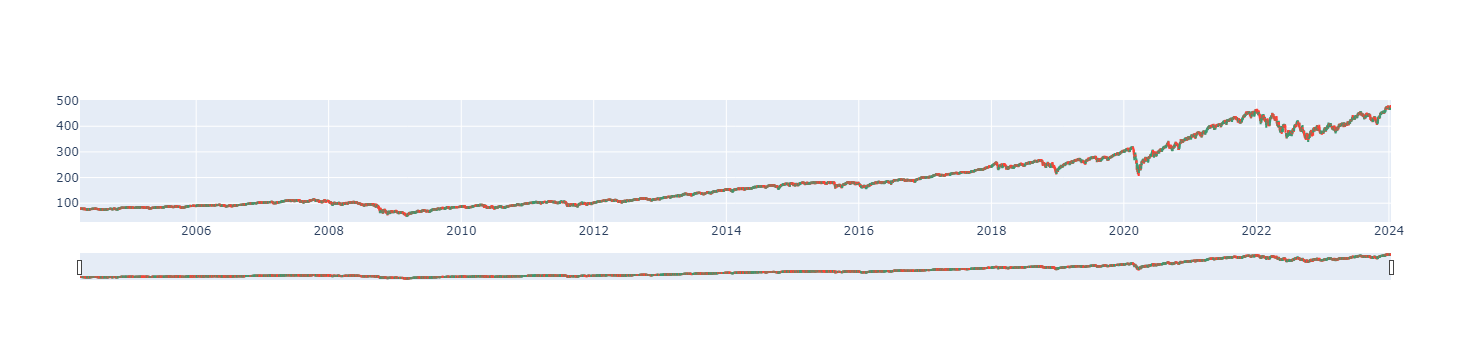

In [23]:
#This graph will give you the candlestick pattern.  When you hover over the candles, you will see the pattern at the time at which you hover the cursor
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df_stock.index,
                open=df_stock['Open'],
                high=df_stock['High'],
                low=df_stock['Low'],
                close=df_stock['Close'])])
fig.update_traces(text=df_stock['pattern'], selector=dict(type='candlestick'))
fig.show()

In [24]:
#Dictionary of patterns with definitions
pattern_dict = {
    'Bullish swing': 'upswing pattern',
    'Bearish swing': 'downward pattern',
    'Bullish pinbar': 'upswing hammer',
    'Bearish pinbar': 'downswing hammer',
    'Inside bar': 'trend change',
    'Outside bar': 'trend change',
    'Bullish engulfing': 'upswing from downtrend',
    'Bearish engulfing': 'downswing from uptrend',
    'No pattern': 'No pattern detected'
    }
#This will give the most current pattern from the dataframe
today = df_stock['pattern'][-1]
for i in today:
    print(f'Todays pattern is {i}, {pattern_dict[i]}')

Todays pattern is Bullish swing, upswing pattern


In [25]:
def last_pattern():
#Dictionary of patterns with definitions
    pattern_dict = {
        'Bullish swing': 'upswing pattern',
        'Bearish swing': 'downward pattern',
        'Bullish pinbar': 'upswing hammer',
        'Bearish pinbar': 'downswing hammer',
        'Inside bar': 'trend change',
        'Outside bar': 'trend change',
        'Bullish engulfing': 'upswing from downtrend',
        'Bearish engulfing': 'downswing from uptrend',
        'No pattern': 'No pattern detected'
        }
    #This will give the most current pattern from the dataframe
    today = df_stock['pattern'][-1]
    for i in today:
        print(f'Todays pattern is {i}, {pattern_dict[i]}')

In [26]:
last_pattern()

Todays pattern is Bullish swing, upswing pattern


In [27]:
#checks the momentum based on the EMA's stacking
#If smaller EMA's stack above the larger, the momentum is positive, vice versa, negative
def momentum_checker(index):
    if (df_stock['m_avg_08'][index] > df_stock['m_avg_21'][index] > df_stock['m_avg_34'][index] > df_stock['m_avg_55'][index] > df_stock['m_avg_89'][index]):
        print('Positive momentum')
    elif (df_stock['m_avg_08'][index] < df_stock['m_avg_21'][index] < df_stock['m_avg_34'][index] < df_stock['m_avg_55'][index] < df_stock['m_avg_89'][index]):
        print('Negative momentum')
    else:
        print('neutral')

In [28]:
#This code throws up a flag to show if the trend of the stock is up, down, or sideways
#It uses the average directional index to determine the strength of the trend
#If ADX > 20 and the plus_di is above the minus_di the trend is positive
#If ADX > 20 and the plus_di is below the minus_di the trend is negative
#If ADX < 20 the trend is sideways

df_stock['ADX_trend'] = 20
df_stock['ADX_ext'] = 35
def ADX_trend_flag(index):
    if (df_stock['adx'][index] > df_stock['ADX_trend'][index]) and (df_stock['plus_di'][index] > df_stock['minus_di'][index]):
        print('positive trend')
    elif (df_stock['adx'][index] > df_stock['ADX_trend'][index]) and (df_stock['plus_di'][index] < df_stock['minus_di'][index]):
        print('negative trend')
    elif (df_stock['adx'][index] < df_stock['ADX_trend'][index]):
        print('neutral or sideways trend.  Stock/ETF is in RTM mode')
        
def ADX_extreme(index):
    if (df_stock['adx'][index] > df_stock['ADX_trend'][index]) and (df_stock['plus_di'][index] > df_stock['minus_di'][index]) and (df_stock['plus_di'][index] >= df_stock['ADX_ext'][index]):
        print('Extreme positive trend, wait for a pullback and invest in calls')
    elif (df_stock['adx'][index] > df_stock['ADX_trend'][index]) and (df_stock['plus_di'][index] < df_stock['minus_di'][index]) and (df_stock['minus_di'][index] >= df_stock['ADX_ext'][index]):
        print('Extreme negative trend, wait for a pullback and invest in puts')
    else:
        print('refer to the ADX trend flag')

In [29]:
#This code gives an early warning if the 8 EMA crosses the 21 to the downside and amplifies the warning if it crosses the 34
#This is especially critical if it is happening to one of the market indices
def warning(index):
    if (df_stock['m_avg_08'][index] < df_stock['m_avg_21'][index]):
        print("""Warning, stock maybe heading down, consider puts on pullback to the 8 EMA.   
                Watch ADX for negative trend. If ADX is below 20 showing a neutral trend,
                You can do RTM Trades when the oscillators show overbought or oversold.  
                If ADX is negative and/or the squeeze histograms are red
                buy puts on pullback to the averages with strict stops.  
                If this happens with any of the market indices such as SPY, QQQ, or DJI,
                hold of on long positions and consider puts.  Continue watching the ADX and watch 
                the chart for the 8 crossing the 34.
                """)
    if (df_stock['m_avg_08'][index] < df_stock['m_avg_34'][index]):
        print("""8 EMA has crossed 34 to the downside.  
                As long as there is tension in the news, 
                you can short or buy puts on any price moves back to the 8 or the 21 ema.
                ADX will likely show a negative trend so keep trading with that, or do
                RTM trading if ADX < 20.
                """)
    elif (df_stock['m_avg_08'][index] > df_stock['m_avg_21'][index]):
        print('Continue as normal and watch for bearish candle patterns, especially when market is overbought and at the top bollinger')

In [30]:
#Warning flag to show if the squeeze is on and what market cycle the stock or index is in
def squeeze_flag(index):
    if (df_stock['squeeze_on'][index] == 1.0):
        print('squeeze is on')
    else:
        print('squeeze is off')
    
def squeeze_momentum(index):    
    if (df_stock['colors'][index] == 'cyan'):
        print('stock is in a mark up mode')
    elif (df_stock['colors'][index] == 'blue'):
        print('stock is in a distribution mode')
    elif (df_stock['colors'][index] == 'yellow'):
        print('stock is in an accumulation mode')
    elif (df_stock['colors'][index] == 'red'):
        print('stock is in a mark down mode')

In [31]:
def BB_flag(index):
    if df_stock['bol_percent_b'][index] >= df_stock['percent_b_high'][index]:
        print('stock is very close to the upper bollinger, watch the candles for bearishness and possible news and either take profits or start hedging.  Also watch for squeeze')
    elif  df_stock['bol_percent_b'][index] <= df_stock['percent_b_low'][index]:
        print('stock is very close to the lower bollinger or even below it, watch the candles for bullishness and possible news.  Cover shorts if any or start looking to buy if the market is conducive.  Watch for squeeze as well')
    else:
        print('stock is between the bollingers at the moment, it is neutral')

In [32]:
def stoch_flag(index):
    if (df_stock["slow_K"][index] < df_stock['Oversold'][index]):
        print('stochastics indicate stock is oversold')
    elif (df_stock["slow_K"][index] > df_stock['Overbought'][index]):
        print('stochastics indicate stock is overbought')
    else:
        print('stock is neutral with the stochastics')

In [33]:
def rsi_flag(index):
    if (df_stock['rsi_09'][index] < df_stock['Oversold'][index]):
        print('rsi indicates stock is oversold')
    elif (df_stock["rsi_09"][index] > df_stock['Overbought'][index]):
        print('rsi indicates stock is overbought')
    else:
        print('stock is neutral with the rsi')

In [34]:
squeeze_flag(-1)

squeeze is on


In [35]:
squeeze_momentum(-1)

stock is in a distribution mode


In [36]:
momentum_checker(-1)

Positive momentum


In [37]:
ADX_trend_flag(-1)

positive trend


In [38]:
ADX_extreme(-1)

refer to the ADX trend flag


In [39]:
warning(-1)

Continue as normal and watch for bearish candle patterns, especially when market is overbought and at the top bollinger


In [40]:
BB_flag(-1)

stock is very close to the upper bollinger, watch the candles for bearishness and possible news and either take profits or start hedging.  Also watch for squeeze


In [41]:
stoch_flag(-1)

stochastics indicate stock is overbought


In [42]:
rsi_flag(-1)

rsi indicates stock is overbought


In [43]:
import contextlib
file_path_d = f'./Data/{value}flagsdaily.txt'
with open(file_path_d, "w") as o:
    with contextlib.redirect_stdout(o):
        last_pattern()
        squeeze_flag(-1)
        squeeze_momentum(-1)
        momentum_checker(-1)
        ADX_trend_flag(-1)
        warning(-1)
        BB_flag(-1)
        stoch_flag(-1)
        rsi_flag(-1)

In [44]:
# Python code to illustrate Sending mail with attachments 
# from your Gmail account  
  
# libraries to be imported 
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
   
fromaddr = "akkrishn1@gmail.com"
toaddr = "fastandtheferocious@gmail.com"
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = f"{value} flags"
  
# string to store the body of the mail 
body = f"Here are the flags for {value} on the daily chart"
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = f"{value}flagsdaily.txt"
attachment = open(f"C:/Users/akkrishn/SqueezeMeBabyOneMoreTime/{value}flagsdaily.txt", "rb") 
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login(fromaddr, "Kr15hn40709") 
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 
  
# terminating the session 
s.quit() 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/akkrishn/SqueezeMeBabyOneMoreTime/maflagsdaily.txt'

In [44]:
# To get the entry and exit signals for the algo trading using squeeze and momentum
# The threshold is to set the histogram of the squeeze as close to the zero line as possible
# We want the squeeze to be on and the histogram to be close to zero and the color of the histogram to be yellow or cyan indicating accumulation
# or markup
t_percent = float(input("enter threshold percentage"))
df_stock['value_threshold'] = abs(df_stock['value'].min()* t_percent)
df_stock['squeeze_threshold'] = 1.0
df_stock["squeeze_entry"] = np.logical_and(np.greater(df_stock["value"], df_stock['value_threshold']), 
                                           np.equal(df_stock['squeeze_on'], df_stock['squeeze_threshold']))
df_stock['squeeze_entry'] = df_stock['squeeze_entry'].astype(float)
df_stock['Entry/Exit'] = df_stock['squeeze_entry'].diff()
df_stock_clean = df_stock.dropna()


enter threshold percentage 0.05


In [46]:
#This is the algo strategy.  The entry is when the squeeze is on and the histogram is near 0 and either yellow or cyan as stated before
#Exit strategy is when the stock moves up any percent you want to input
#The form of input is 1.something
#this means for example 1.5 means 50%

def implement_bb_strategy(data, squeeze_on, squeeze_value, upper_kc, threshold, color):
    percent = float(input("Enter percent return"))
    #stop_loss = float(input("Enter percent stop loss"))
    
    buy_price = []
    sell_price = []
    squeeze_signal = []
    signal = 0.0
    buy_close = 0
    buy = False

    
    for close, squeeze, value, kc, thresh, color  in zip(data, squeeze_on, squeeze_value, upper_kc, threshold, color):
        if squeeze == 1.0 and value < thresh and (color == 'yellow' or color == 'cyan'):
            if signal != 1:
                buy_price.append(close)
                buy = True
                sell_price.append(np.nan)
                buy_close = close
                signal = 1.0
                squeeze_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                squeeze_signal.append(0)
        elif buy and close >= (buy_close*percent):
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(close)
                signal = -1
                buy = False
                squeeze_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                squeeze_signal.append(0)
        #elif buy and close <= (buy_close*stop_loss):
         #   if signal == 1:
          #      buy_price.append(np.nan)
           #     sell_price.append(close)
            #    signal = -1
             #   buy = False
              #  squeeze_signal.append(signal)
            
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            squeeze_signal.append(0)
            
    return buy_price, sell_price, squeeze_signal

In [47]:
# calling the algo function and returning the buy price, sell price, and the squeeze signal
buy_price, sell_price, squeeze_signal = implement_bb_strategy(df_stock["Close"], df_stock['squeeze_on'], df_stock['value'], 
                                                              df_stock['upper_KC'], df_stock['value_threshold'], df_stock['colors'])

Enter percent return 1.10


In [48]:
#setting dataframes to the results of the algo function
df_stock['buy_price'] =  buy_price
df_stock['sell_price'] = sell_price
df_stock['squeeze_signal'] = squeeze_signal

In [49]:
# This is give the entry and exit signals in the form of a green triangle and red triangle respectively
# Visualize exit position relative to close price
exit = df_stock[df_stock['squeeze_signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = df_stock[df_stock['squeeze_signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df_stock[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

entry_exit_plot = security_close * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [50]:
def algo_plot_daily():
    # This is give the entry and exit signals in the form of a green triangle and red triangle respectively
    # Visualize exit position relative to close price
    exit = df_stock[df_stock['squeeze_signal'] == -1.0]['Close'].hvplot.scatter(
        color='red',
        marker='v',
        size=200,
        legend=False,
        ylabel='Price in $',
        width=1000,
        height=400
    )

    # Visualize entry position relative to close price
    entry = df_stock[df_stock['squeeze_signal'] == 1.0]['Close'].hvplot.scatter(
        color='green',
        marker='^',
        size=200,
        legend=False,
        ylabel='Price in $',
        width=1000,
        height=400
    )

    # Visualize close price for the investment
    security_close = df_stock[['Close']].hvplot(
        line_color='lightgray',
        ylabel='Price in $',
        width=1000,
        height=400
    )

    entry_exit_plot = security_close * entry * exit
    return entry_exit_plot

In [51]:
algo_plot_daily()

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [52]:
# This code tells us to enter into a position when the squeeze signal is triggered according to the algo function given above
position = []
for i in range(len(squeeze_signal)):
    if df_stock['squeeze_signal'][i] < 1:
        position.append(0)
    else:
        position.append(1)

        
for i in range(len(df_stock['Close'])):
    if df_stock['squeeze_signal'][i] == 1:
        position[i] = 1
    elif df_stock['squeeze_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
#upper_bb = tsla['upper_bb']
#lower_bb = tsla['lower_bb']
close_price = df_stock['Close']
squeeze_signal = pd.DataFrame(squeeze_signal).rename(columns = {0:'squeeze_signal'}).set_index(df_stock.index)
position = pd.DataFrame(position).rename(columns = {0:'squeeze_position'}).set_index(df_stock.index)

frames = [close_price, squeeze_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index()

strategy.tail(100)

Date       Close  squeeze_signal  squeeze_position
4880 2023-08-22 00:00:00-04:00  434.846863             0.0                 1
4881 2023-08-23 00:00:00-04:00  439.690094             0.0                 1
4882 2023-08-24 00:00:00-04:00  433.596405             0.0                 1
4883 2023-08-25 00:00:00-04:00  436.653168             0.0                 1
4884 2023-08-28 00:00:00-04:00  439.422150             0.0                 1
4885 2023-08-29 00:00:00-04:00  445.773895             0.0                 1
4886 2023-08-30 00:00:00-04:00  447.609955             0.0                 1
4887 2023-08-31 00:00:00-04:00  446.954926             0.0                 1
4888 2023-09-01 00:00:00-04:00  447.788574             0.0                 1
4889 2023-09-05 00:00:00-04:00  445.853271             0.0                 1
4890 2023-09-06 00:00:00-04:00  442.856018             0.0                 1
4891 2023-09-07 00:00:00-04:00  441.496368             0.0                 1
4892 2023-09-08 00:00:00-04:00  442.161316             0.0                 1
4893 2023-09-11 00:00:00-04:00  445.069244             0.0                 1
4894 2023-09-12 00:00:00-04:00  442.627777             0.0                 1
4895 2023-09-13 00:00:00-04:00  443.143860             0.0                 1
4896 2023-09-14 00:00:00-04:00  446.964844             0.0                 1
4897 2023-09-15 00:00:00-04:00  441.579651             0.0                 1
4898 2023-09-18 00:00:00-04:00  441.838623             0.0                 1
4899 2023-09-19 00:00:00-04:00  440.922302             0.0                 1
4900 2023-09-20 00:00:00-04:00  436.868774             0.0                 1
4901 2023-09-21 00:00:00-04:00  429.648041             0.0                 1
4902 2023-09-22 00:00:00-04:00  428.681976             0.0                 1
4903 2023-09-25 00:00:00-04:00  430.484650             0.0                 1
4904 2023-09-26 00:00:00-04:00  424.160278             0.0                 1
4905 2023-09-27 00:00:00-04:00  424.329590             0.0                 1
4906 2023-09-28 00:00:00-04:00  426.789612             0.0                 1
4907 2023-09-29 00:00:00-04:00  425.753845             0.0                 1
4908 2023-10-02 00:00:00-04:00  425.584503             0.0                 1
4909 2023-10-03 00:00:00-04:00  419.887604             0.0                 1
4910 2023-10-04 00:00:00-04:00  422.945221             0.0                 1
4911 2023-10-05 00:00:00-04:00  422.785858             0.0                 1
4912 2023-10-06 00:00:00-04:00  427.805511             0.0                 1
4913 2023-10-09 00:00:00-04:00  430.544403             0.0                 1
4914 2023-10-10 00:00:00-04:00  432.785309             0.0                 1
4915 2023-10-11 00:00:00-04:00  434.558136             0.0                 1
4916 2023-10-12 00:00:00-04:00  431.908875             0.0                 1
4917 2023-10-13 00:00:00-04:00  429.757599             0.0                 1
4918 2023-10-16 00:00:00-04:00  434.279266             0.0                 1
4919 2023-10-17 00:00:00-04:00  434.259338             0.0                 1
4920 2023-10-18 00:00:00-04:00  428.472778             0.0                 1
4921 2023-10-19 00:00:00-04:00  424.708038             0.0                 1
4922 2023-10-20 00:00:00-04:00  419.489227             0.0                 1
4923 2023-10-23 00:00:00-04:00  418.762146             0.0                 1
4924 2023-10-24 00:00:00-04:00  421.919373             0.0                 1
4925 2023-10-25 00:00:00-04:00  415.863892             0.0                 1
4926 2023-10-26 00:00:00-04:00  410.884094             0.0                 1
4927 2023-10-27 00:00:00-04:00  409.021637             0.0                 1
4928 2023-10-30 00:00:00-04:00  413.911835             0.0                 1
4929 2023-10-31 00:00:00-04:00  416.511292             0.0                 1
4930 2023-11-01 00:00:00-04:00  420.953278             0.0                 1
4931 2023-11-02 00:00:

In [53]:
#This code gives us the results of the Algo trade compounding the % return and starting with 100000 as the initial investment and telling 

stock_ret = pd.DataFrame(np.diff(df_stock['Close'])).rename(columns = {0:'returns'})
squeeze_strategy_ret = []
return_sum = 0

for i in range(len(stock_ret)):
    try:
        returns = stock_ret['returns'][i]*strategy['squeeze_position'][i]
        squeeze_strategy_ret.append(returns)
    except:
        pass
    
squeeze_strategy_ret_df = pd.DataFrame(squeeze_strategy_ret).rename(columns = {0:'squeeze_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df_stock['Close'][-1])
squeeze_investment_ret = []

for i in range(len(squeeze_strategy_ret_df['squeeze_returns'])):
    #df_stock_wk['cumluative_return'] = np.exp(np.log1p(df_stock_wk['pct_change']).cumsum())
    returns = (number_of_stocks*squeeze_strategy_ret_df['squeeze_returns'][i])
    squeeze_investment_ret.append(returns)
    return_sum += returns
    new_investment_value = return_sum + investment_value
    number_of_stocks = math.floor(new_investment_value/df_stock['Close'][i-1])
    
squeeze_investment_ret_df = pd.DataFrame(squeeze_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(squeeze_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(f'Profit gained from the Squeeze strategy by investing $100k in {value} is {total_investment_ret}')
print(f'Profit percentage of the Squeeze strategy : {profit_percentage}%')
print(return_sum)


Profit gained from the Squeeze strategy by investing $100k in SPY is 469474.82
Profit percentage of the Squeeze strategy : 469%
469474.81674957275


In [54]:
def daily_algo_return():
    stock_ret = pd.DataFrame(np.diff(df_stock['Close'])).rename(columns = {0:'returns'})
    squeeze_strategy_ret = []
    return_sum = 0

    for i in range(len(stock_ret)):
        try:
            returns = stock_ret['returns'][i]*strategy['squeeze_position'][i]
            squeeze_strategy_ret.append(returns)
        except:
            pass

    squeeze_strategy_ret_df = pd.DataFrame(squeeze_strategy_ret).rename(columns = {0:'squeeze_returns'})

    investment_value = 100000
    number_of_stocks = math.floor(investment_value/df_stock['Close'][-1])
    squeeze_investment_ret = []

    for i in range(len(squeeze_strategy_ret_df['squeeze_returns'])):
        #df_stock_wk['cumluative_return'] = np.exp(np.log1p(df_stock_wk['pct_change']).cumsum())
        returns = (number_of_stocks*squeeze_strategy_ret_df['squeeze_returns'][i])
        squeeze_investment_ret.append(returns)
        return_sum += returns
        new_investment_value = return_sum + investment_value
        number_of_stocks = math.floor(new_investment_value/df_stock['Close'][i-1])

    squeeze_investment_ret_df = pd.DataFrame(squeeze_investment_ret).rename(columns = {0:'investment_returns'})
    total_investment_ret = round(sum(squeeze_investment_ret_df['investment_returns']), 2)
    profit_percentage = math.floor((total_investment_ret/investment_value)*100)
    return f'Profit gained from the Squeeze strategy by investing $100k in {value} is {total_investment_ret} and the profit percent is {profit_percentage}%'
    #print(f'Profit percentage of the Squeeze strategy : {profit_percentage}%')
    #print(return_sum)

In [55]:
daily_algo_return()

'Profit gained from the Squeeze strategy by investing $100k in SPY is 469474.82 and the profit percent is 469%'

In [56]:
from yahoo_fin import options
import plotly.graph_objects as go
import pandas as pd

def list_of_expiry_dates(value):
    exp_dates = options.get_expiration_dates(value)
    #days = exp_dates - today_date
    return exp_dates

list_of_expiry_dates(value)

['January 16, 2024',
 'January 17, 2024',
 'January 18, 2024',
 'January 19, 2024',
 'January 26, 2024',
 'January 31, 2024',
 'February 2, 2024',
 'February 9, 2024',
 'February 16, 2024',
 'February 23, 2024',
 'February 29, 2024',
 'March 15, 2024',
 'March 28, 2024',
 'April 19, 2024',
 'April 30, 2024',
 'May 31, 2024',
 'June 21, 2024',
 'June 28, 2024',
 'September 20, 2024',
 'September 30, 2024',
 'December 20, 2024',
 'December 31, 2024',
 'January 17, 2025',
 'March 21, 2025',
 'June 20, 2025',
 'December 19, 2025',
 'January 16, 2026',
 'December 18, 2026']

In [57]:
expiry = input('enter expiry date eg 12/17/2021')
def get_option_chain_calls(value):
    option_chain = options.get_options_chain(value)
    calls_chain = options.get_calls(value, expiry)
    return calls_chain

enter expiry date eg 12/17/2021 01/17/2025


In [58]:
def get_option_chain_puts(value):
    option_chain = options.get_options_chain(value)
    puts_chain = options.get_puts(value, expiry)
    return puts_chain

In [59]:
get_option_chain_calls(value)

Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0   MA250117C00145000  2023-12-04 10:33AM EST   145.0      271.42  283.10   
1   MA250117C00150000   2023-01-23 2:44PM EST   150.0      240.12  214.50   
2   MA250117C00155000   2022-11-03 2:03PM EST   155.0      175.10  216.50   
3   MA250117C00160000  2023-12-04 10:21AM EST   160.0      258.35  269.00   
4   MA250117C00165000  2023-11-21 10:22AM EST   165.0      250.04  264.45   
5   MA250117C00170000  2023-11-29 12:40PM EST   170.0      248.38  259.55   
6   MA250117C00175000   2023-09-20 9:06AM EST   175.0      250.34  217.50   
7   MA250117C00180000   2022-12-29 3:07PM EST   180.0      187.75  206.00   
8   MA250117C00185000  2022-12-19 10:48AM EST   185.0      178.45  200.00   
9   MA250117C00195000   2023-12-12 2:46PM EST   195.0      232.60  236.25   
10  MA250117C00200000   2023-12-12 3:25PM EST   200.0      229.00  231.50   
11  MA250117C00210000   2023-08-28 2:02PM EST   210.0      211.00  197.50   
12  MA250117C00220000  2023-12-07 12:35PM EST   220.0      203.70  213.40   
13  MA250117C00230000  2023-09-18 10:57AM EST   230.0      202.90  177.55   
14  MA250117C00240000   2023-12-11 3:14PM EST   240.0      187.19  194.40   
15  MA250117C00250000   2023-12-07 1:06PM EST   250.0      176.00  185.25   
16  MA250117C00260000   2023-12-05 3:53PM EST   260.0      162.45  176.10   
17  MA250117C00270000   2023-12-18 2:28PM EST   270.0      167.78  167.90   
18  MA250117C00280000   2023-11-21 9:53AM EST   280.0      146.00  158.60   
19  MA250117C00290000  2023-12-13 10:01AM EST   290.0      148.07  149.85   
20  MA250117C00300000   2023-12-18 2:28PM EST   300.0      141.28  140.00   
21  MA250117C00310000   2023-12-18 1:28PM EST   310.0      132.40  131.00   
22  MA250117C00320000  2023-12-15 10:06AM EST   320.0      117.05  123.70   
23  MA250117C00330000  2023-12-18 12:42PM EST   330.0      114.15  115.85   
24  MA250117C00340000  2023-12-01 12:37PM EST   340.0      101.50  107.15   
25  MA250117C00350000  2023-12-19 10:47AM EST   350.0      100.25   97.55   
26  MA250117C00360000  2023-12-18 12:42PM EST   360.0       90.15   91.85   
27  MA250117C00370000   2023-12-18 2:32PM EST   370.0       83.38   82.70   
28  MA250117C00380000  2023-12-18 11:19AM EST   380.0       75.55   74.75   
29  MA250117C00390000  2023-12-19 11:17AM EST   390.0       70.50   67.55   
30  MA250117C00400000   2023-12-15 9:56AM EST   400.0       56.50   60.75   
31  MA250117C00410000  2023-12-18 10:24AM EST   410.0       53.30   55.30   
32  MA250117C00420000   2023-12-19 9:51AM EST   420.0       48.76   49.55   
33  MA250117C00430000   2023-12-19 1:13PM EST   430.0       43.30   43.75   
34  MA250117C00440000   2023-12-19 3:00PM EST   440.0       38.25   36.50   
35  MA250117C00450000   2023-12-19 2:45PM EST   450.0       33.25   33.40   
36  MA250117C00460000   2023-12-19 2:04PM EST   460.0       28.80   28.85   
37  MA250117C00470000   2023-12-19 3:03PM EST   470.0       24.45   24.70   
38  MA250117C00480000   2023-12-19 3:54PM EST   480.0       21.02   20.65   
39  MA250117C00490000   2023-12-19 1:27PM EST   490.0       17.30   17.80   
40  MA250117C00500000   2023-12-19 1:01PM EST   500.0       14.35   14.45   
41  MA250117C00520000   2023-12-19 9:36AM EST   520.0        9.25    9.30   
42  MA250117C00540000  2023-12-19 11:59AM EST   540.0        6.65    6.70   
43  MA250117C00560000  2023-12-19 12:00PM EST   560.0        4.25    4.30   
44  MA250117C00580000   2023-12-19 2:19PM EST   580.0        2.77    2.71   
45  MA250117C00600000   2023-12-19 3:54PM EST   600.0        1.76    1.66   
46  MA250117C00620000   2023-12-19 1:30PM EST   620.0        1.06    0.99   

       Ask  Change % Change  Volume  Open Interest Implied Volatility  
0   286.50    0.00        -       3              8             66.77%  
1   220.00    0.00        -       5              5              0.00%  
2   221.00    0.00        -      10             11              0.00%  
3   272.50    0.00     

In [60]:
get_option_chain_puts(value)

Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0   MA250117P00145000   2023-12-14 2:24PM EST   145.0        0.20    0.00   
1   MA250117P00150000  2023-11-20 12:32PM EST   150.0        0.33    0.02   
2   MA250117P00155000   2023-11-28 3:44PM EST   155.0        0.27    0.04   
3   MA250117P00160000  2023-12-12 11:21AM EST   160.0        0.38    0.08   
4   MA250117P00165000   2023-11-28 3:40PM EST   165.0        0.43    0.07   
5   MA250117P00170000   2023-11-29 2:47PM EST   170.0        0.41    0.09   
6   MA250117P00175000   2023-11-28 3:46PM EST   175.0        0.51    0.11   
7   MA250117P00180000   2023-11-30 9:58AM EST   180.0        0.64    0.13   
8   MA250117P00185000  2023-12-05 11:49AM EST   185.0        0.62    0.16   
9   MA250117P00190000   2023-11-28 3:41PM EST   190.0        0.73    0.19   
10  MA250117P00195000   2023-11-28 3:41PM EST   195.0        0.80    0.22   
11  MA250117P00200000  2023-12-05 11:49AM EST   200.0        0.84    0.25   
12  MA250117P00210000   2023-12-13 2:17PM EST   210.0        0.54    0.32   
13  MA250117P00220000   2023-12-18 3:56PM EST   220.0        1.28    0.13   
14  MA250117P00230000   2023-11-28 3:41PM EST   230.0        1.58    0.53   
15  MA250117P00240000  2023-11-27 11:49AM EST   240.0        1.90    1.00   
16  MA250117P00250000   2023-12-08 3:22PM EST   250.0        2.19    0.66   
17  MA250117P00260000  2023-12-05 12:42PM EST   260.0        3.00    1.11   
18  MA250117P00270000   2023-12-19 1:31PM EST   270.0        2.69    2.46   
19  MA250117P00280000   2023-12-18 3:31PM EST   280.0        2.90    2.94   
20  MA250117P00290000  2023-12-12 11:23AM EST   290.0        4.04    3.45   
21  MA250117P00300000   2023-12-14 2:33PM EST   300.0        4.90    4.10   
22  MA250117P00310000  2023-12-15 10:24AM EST   310.0        5.50    4.85   
23  MA250117P00320000  2023-12-13 10:56AM EST   320.0        6.50    6.00   
24  MA250117P00330000  2023-12-18 12:06PM EST   330.0        7.05    6.90   
25  MA250117P00340000   2023-12-15 2:07PM EST   340.0        9.14    8.10   
26  MA250117P00350000   2023-12-19 1:58PM EST   350.0        9.68    9.60   
27  MA250117P00360000  2023-12-18 12:07PM EST   360.0       11.30   11.10   
28  MA250117P00370000   2023-12-18 2:34PM EST   370.0       12.92   11.75   
29  MA250117P00380000  2023-12-18 12:24PM EST   380.0       15.00   14.95   
30  MA250117P00390000  2023-12-19 12:33PM EST   390.0       17.40   17.50   
31  MA250117P00400000   2023-12-19 2:53PM EST   400.0       20.78   20.20   
32  MA250117P00410000   2023-12-19 2:53PM EST   410.0       23.88   23.30   
33  MA250117P00420000   2023-12-18 1:23PM EST   420.0       26.70   25.85   
34  MA250117P00430000  2023-12-19 11:18AM EST   430.0       30.65   30.05   
35  MA250117P00440000  2023-12-18 10:51AM EST   440.0       35.49   35.25   
36  MA250117P00450000   2023-12-14 3:17PM EST   450.0       44.08   40.20   
37  MA250117P00460000  2023-12-18 10:01AM EST   460.0       44.65   44.40   
38  MA250117P00470000  2023-12-19 11:45AM EST   470.0       50.95   51.75   
39  MA250117P00480000  2023-12-19 11:59AM EST   480.0       58.30   57.50   
40  MA250117P00490000   2023-12-19 1:30PM EST   490.0       66.95   65.10   
41  MA250117P00500000  2023-09-21 10:35AM EST   500.0       97.00  113.00   
42  MA250117P00520000   2022-12-01 1:45PM EST   520.0      160.35  170.50   
43  MA250117P00540000   2023-01-27 1:12PM EST   540.0      165.50  185.15   
44  MA250117P00560000   2023-01-12 3:32PM EST   560.0      180.10  190.50   
45  MA250117P00580000   2023-10-27 8:33AM EST   580.0      217.65  166.15   

       Ask  Change % Change Volume  Open Interest Implied Volatility  
0     0.88    0.00        -      1            141             49.96%  
1     1.45    0.00        -      2            115             52.52%  
2     1.48    0.00        -      2             34             51.16%  
3     0.98    0.00        -      1             42             46.45%  
4     1.01    0.00        -      

In [226]:
import datetime
today_date = datetime.date.today()
today_date = str(today_date)
today_date

'2021-12-06'